In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
plt.style.use('ggplot')

In [5]:
file = '/Users/tim/Documents/GitHub/Analytics/Tableau/office_supplies.csv'
df = pd.read_csv(file)
# df.head()

In [7]:
df['Sales'] = df['Units'] * df['Unit Price']

In [92]:
accumulated_sales = df.groupby(by=['Region', 'Rep'])['Sales'].agg('sum').reset_index()
accumulated_sales = accumulated_sales.sort_values(['Region', 'Sales']).reset_index(drop=True)
# print(accumulated_sales.groupby('Region')['Sales'].idxmax())
# print(accumulated_sales.loc[accumulated_sales.groupby('Region')['Sales'].idxmax()])

In [93]:
accumulated_sales

,Region,Rep,Sales
0,Central,Rachel,438.37
1,Central,Morgan,1387.77
2,Central,Smith,1641.43
3,Central,Bill,1749.87
4,Central,Alex,2812.19
5,Central,Matthew,3109.44
6,East,Nick,536.75
7,East,Richard,2363.04
8,East,Susan,3102.30
9,West,Thomas,1203.11


In [94]:
def define_colours_for_bars(input_array):
    colour_list = list(plt.rcParams['axes.prop_cycle'])
    index_array = np.array([np.where(input_array.unique() == i) for i in input_array]).flatten()
    return [list(plt.rcParams['axes.prop_cycle'])[i]['color'] for i in index_array]

In [95]:
labels = accumulated_sales['Rep']
sales_quantum = accumulated_sales['Sales']
region = define_colours_for_bars(accumulated_sales['Region'])

<BarContainer object of 11 artists>

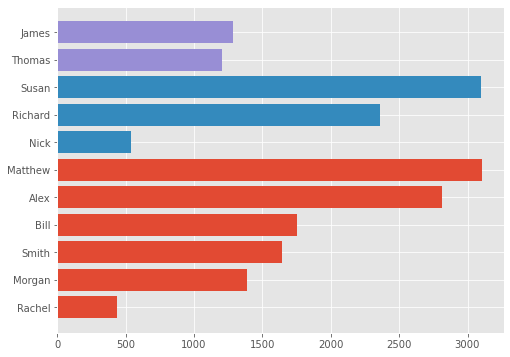

In [96]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(y=labels, width=sales_quantum, color=region)
# ax.set_ylabel("Test", fontsize=20)
